# Youtube Trending data: 나라 별 자료 분석

In [2]:
import pandas as pd

__한국, 일본의 데이터를 불러온 뒤 country 변수 추가__

In [3]:
input_fd = open('KRvideos.csv',errors = 'backslashreplace',encoding='utf-8')
KR_videos = pd.read_csv(input_fd)

KR_videos['country']='Korea'

In [4]:
#KR_videos.head()

In [5]:
input_fd = open('JPvideos.csv', errors = 'backslashreplace',encoding='utf-8')
JP_videos = pd.read_csv(input_fd)

JP_videos['country']='Japan'

In [6]:
#JP_videos.head()

__한국과 일본의 데이터 병합__

In [7]:
df = pd.concat([KR_videos, JP_videos],sort=True)
df.head()

,category_id,channel_title,comment_count,comments_disabled,country,description,dislikes,likes,publish_time,ratings_disabled,tags,thumbnail_link,title,trending_date,video_error_or_removed,video_id,views
0,22,라푸마코리아,272,False,Korea,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,40,1422,2017-11-13T07:07:36.000Z,False,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,좋아 by 민서_윤종신_좋니 답가,17.14.11,False,RxGQe4EeEpA,156130
1,25,Edward,113,False,Korea,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...,28,211,2017-11-13T10:59:16.000Z,False,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,JSA 귀순 북한군 총격 부상,17.14.11,False,hH7wVE8OlQ0,76533
2,22,나몰라패밀리 핫쇼,459,False,Korea,퍼가실때 꼭 출처 부탁드려요,166,5112,2017-11-11T07:16:08.000Z,False,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),17.14.11,False,9V8bnWUmE9U,421409
3,25,미디어몽구,1219,False,Korea,다스는 누구겁니까 듣고 난 후 표정,173,2093,2017-11-12T11:19:52.000Z,False,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,"이명박 출국 현장, 놓치면 안되는 장면",17.14.11,False,0_8py-t5R80,222850
4,25,NocutV,450,False,Korea,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...,109,1094,2017-11-13T11:08:59.000Z,False,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,김장겸은 물러갔다 MBC 노조 환호와 눈물,17.14.11,False,bk55RbxiQdI,84466


__카테고리 변수 설명 들어있는 json파일 불러온 뒤 기존 df에 붙이기__

In [8]:
import json

id_to_category = {}

with open(r"C:\Users\Hyunjung\ESAA\과제\KR_category_id.json", 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

#id_to_category

In [9]:
df["category_id"] = df["category_id"].astype(str)
df.insert(4, "category", df["category_id"].map(id_to_category))

In [10]:
df.head()

,category_id,channel_title,comment_count,comments_disabled,category,country,description,dislikes,likes,publish_time,ratings_disabled,tags,thumbnail_link,title,trending_date,video_error_or_removed,video_id,views
0,22,라푸마코리아,272,False,People & Blogs,Korea,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,40,1422,2017-11-13T07:07:36.000Z,False,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,좋아 by 민서_윤종신_좋니 답가,17.14.11,False,RxGQe4EeEpA,156130
1,25,Edward,113,False,News & Politics,Korea,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...,28,211,2017-11-13T10:59:16.000Z,False,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,JSA 귀순 북한군 총격 부상,17.14.11,False,hH7wVE8OlQ0,76533
2,22,나몰라패밀리 핫쇼,459,False,People & Blogs,Korea,퍼가실때 꼭 출처 부탁드려요,166,5112,2017-11-11T07:16:08.000Z,False,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),17.14.11,False,9V8bnWUmE9U,421409
3,25,미디어몽구,1219,False,News & Politics,Korea,다스는 누구겁니까 듣고 난 후 표정,173,2093,2017-11-12T11:19:52.000Z,False,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,"이명박 출국 현장, 놓치면 안되는 장면",17.14.11,False,0_8py-t5R80,222850
4,25,NocutV,450,False,News & Politics,Korea,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...,109,1094,2017-11-13T11:08:59.000Z,False,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,김장겸은 물러갔다 MBC 노조 환호와 눈물,17.14.11,False,bk55RbxiQdI,84466


__결측치 살펴보기__

In [11]:
df.isnull().sum()

category_id                  0
channel_title                0
comment_count                0
comments_disabled            0
category                   306
country                      0
description               5287
dislikes                     0
likes                        0
publish_time                 0
ratings_disabled             0
tags                         0
thumbnail_link               0
title                        0
trending_date                0
video_error_or_removed       0
video_id                     0
views                        0
dtype: int64

=> description 변수의 경우 분석에 사용하지 않을 것이기 때문에 결측치가 있어도 상관이 없지만 category 변수는 분석에 사용할 것이기 때문에 결측치를 확인해 본다.

In [12]:
df["category_id"].loc[df["category"].isnull() == True].value_counts()

29    306
Name: category_id, dtype: int64

In [13]:
#df["category"].loc[df["category"].isnull() == True] = "Nonprofits & Activism"
#할지 말지 정하기

In [14]:
#df.head()

In [15]:
#df['category_id'].value_counts()
#df.info()
#df.describe()

## 1. 전체 자료 수/자료 수 대비 조회수 비교

### 1-1. 나라 별 총 동영상 수

In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 

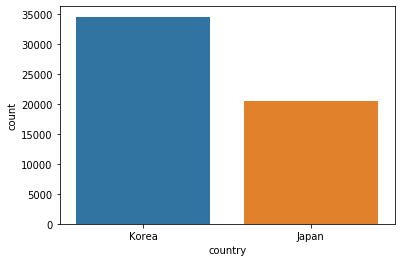

In [17]:
ax = plt.subplots() 
ax = sns.countplot('country', data=df) 

### 1-2. 나라 별 평균 조회수

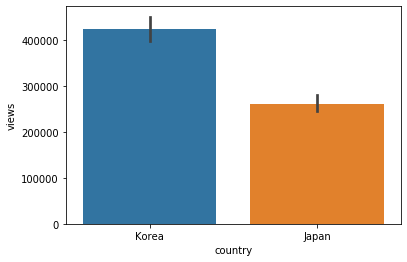

In [18]:
ax = plt.subplots() 
ax = sns.barplot(x='country', y='views', data=df)

__업로드한 동영상 수는 한국이 일본보다 많고 평균 조회수도 한국이 일본보다 높다.__

__한국 유튜브 사용자(채널 운영자+서비스 이용자)가 일본 유튜브 사용자보다 많다.__ 

### 1-3. 나라 별 조회수/자료수

In [19]:
print('한국:', sum(df[df['country']=="Korea"]['views'])/len(df[df['country']=="Korea"]))
print('일본:', sum(df[df['country']=="Japan"]['views'])/len(df[df['country']=="Japan"]))


#df_KR = df[df['country']=="Korea"]
#df_JP = df[df['country']=="Japan"]

#ax = plt.subplots() 
#ax = sns.barplot(x='country', y='ratio', data=df) 

한국: 424947.27089420543
일본: 262021.47005798374


__동영상 하나 당 조회수 또한 한국이 일본보다 잘 나온다.__

## 2. 카테고리 비교

In [20]:
print("전체 데이터 {}개\ncategory 개수 {}개\n".format(len(df),len(df["category"].unique())))
for i in range(len(df["category"].value_counts())):
    print("{:23} {:4} {:.2f}".format(df["category"].value_counts().index[i],
                            df["category"].value_counts().values[i],
                            df["category"].value_counts(normalize = True).values[i]))

전체 데이터 55090개
category 개수 17개

Entertainment           15214 0.28
People & Blogs          10971 0.20
News & Politics         8974 0.16
Film & Animation        3420 0.06
Music                   3115 0.06
Sports                  2973 0.05
Comedy                  2799 0.05
Gaming                  2422 0.04
Pets & Animals          1862 0.03
Howto & Style           1357 0.02
Education                598 0.01
Autos & Vehicles         400 0.01
Science & Technology     273 0.00
Travel & Events          239 0.00
Shows                    165 0.00
Trailers                   2 0.00


### 2-1.  나라 별 카테고리 당 동영상 수

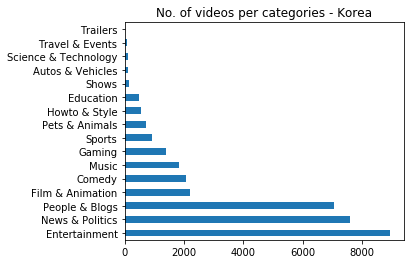

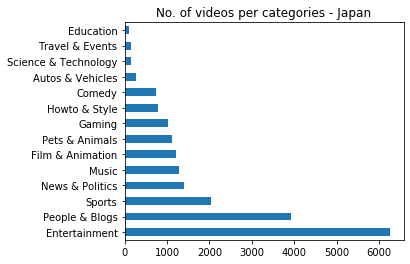

In [21]:
df_KR = df[df['country']=="Korea"]
df_JP = df[df['country']=="Japan"]

category_count_KR = df_KR['category'].value_counts()
category_count_JP = df_JP['category'].value_counts() 


plt.figure(1)
ax1 = category_count_KR.plot.barh(figsize=(5,4))

plt.figure(2)
ax2 = category_count_JP.plot.barh(figsize=(5,4))

ax1.set_title('No. of videos per categories - Korea')
ax2.set_title('No. of videos per categories - Japan')

plt.show()

__한국 top5: Entertainment -> News&Politics -> People&Blogs -> Film&Animation -> Comedy__

__일본 top5: Entertainment -> People&Blogs -> Sports -> News&Politics -> Music__

두 나라 모두 Entertainment 분야의 동영상이 가장 많다. 한국은 일본보다 비교적 News&Politics 분야의 컨텐츠가 많고 일본은 비교적 Sports 분야의 컨텐츠가 많다.

### 2-2 나라 별 카테고리 당 조회수

Text(0.5, 1.0, 'View counts per categories - Japan')

<Figure size 432x288 with 0 Axes>

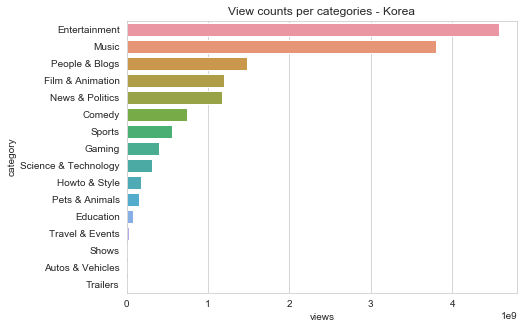

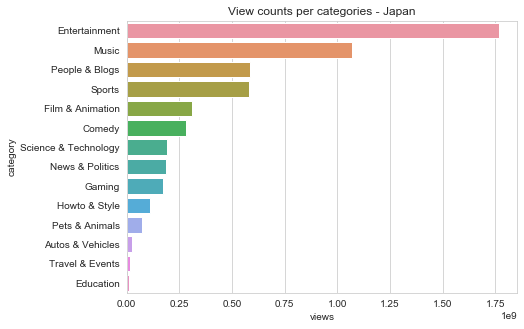

In [44]:
viewskr = df_KR.groupby('category')['views'].agg('sum')
viewskr = viewskr.sort_values(ascending=False).reset_index()

plt.figure(1)
viewskr.columns = ['category','views']
plt.subplots(figsize=(7, 5))
kr = sns.barplot(x="views", y="category", data=viewskr)
kr.set_title("View counts per categories - Korea") 


viewsjp = df_JP.groupby('category')['views'].agg('sum')
viewsjp = viewsjp.sort_values(ascending=False).reset_index()

plt.figure(2)
viewsjp.columns = ['category','views']
plt.subplots(figsize=(7, 5))
kr = sns.barplot(x="views", y="category", data=viewsjp)
kr.set_title("View counts per categories - Japan") 

def category_count_sum(values):
    sum = 0 
    for value in values:
        sum += value  
    return sum
df_KR = df[df['country']=="Korea"]
df_JP = df[df['country']=="Japan"]

KR_sum_category = df_KR.groupby('category').agg(category_count_sum)['views']
JP_sum_category = df_JP.groupby('category').agg(category_count_sum)['views']

print('Korea \n', KR_sum_category.sort_values(ascending=False), '\n') 
print('Japan \n', JP_sum_category.sort_values(ascending=False))

In [332]:
df[df['category']=="Entertainment"].head(10)

,category_id,channel_title,comment_count,comments_disabled,category,country,description,dislikes,likes,publish_time,ratings_disabled,tags,thumbnail_link,title,trending_date,video_error_or_removed,video_id,views
15,24,BJ KANG,240,False,Entertainment,Korea,이재정 더불어 민주당 의원 / 종북 몰이 전희경 / 걸크러쉬 이재정 / 주광덕 전희...,82,428,2017-11-12T07:48:04.000Z,False,"임종석|""비서실장""|""김정숙""|""홍진호""|""신경민""|""이재정""|""이낙연""|""조응천""...",https://i.ytimg.com/vi/gmavEUSx1eA/default.jpg,슈퍼우먼 이재정 대단! 전희경 종북몰이 박살! 핵사이다~,17.14.11,False,gmavEUSx1eA,83873
16,24,thefact,1025,False,Entertainment,Korea,수년간 이어져 온 성심병원 간호사 장기자랑 논란. 성심병원 일부 간호사들이 재단 체...,223,348,2017-11-11T07:51:25.000Z,False,"성심병원|""한림대""|""간호사""|""장기자랑""",https://i.ytimg.com/vi/BOo4GnCfoEo/default.jpg,[TF영상] 성심병원 간호사 장기자랑 논란…키·체중 제한도 있어,17.14.11,False,BOo4GnCfoEo,419815
17,24,티캐스트 tcast,376,False,Entertainment,Korea,방송 최초 공개! 소녀시대 써니의 하루 일상\n\n#너에게나를보낸다 매주 (토) 밤...,116,1163,2017-11-13T08:00:03.000Z,False,"신동엽|""신화""|""앤디""|""소녀시대""|""써니""|""아이돌""|""예능""|""정은표""|""김동...",https://i.ytimg.com/vi/mrEqnxtq_Hk/default.jpg,방송 최초 공개! 소녀시대 써니의 하루 일상 [너에게 나를 보낸다] 2회 171109,17.14.11,False,mrEqnxtq_Hk,299101
18,24,맛있는 녀석들 (Tasty Guys),74,False,Entertainment,Korea,식도 하이패스 통과\n\n#맛있는녀석들 매주 금요일 오후 8시 #ComedyTV 에...,16,297,2017-11-13T09:00:02.000Z,False,"맛있는 녀석들|""Tasty Guys""|""김준현""|""김민경""|""문세윤""|""유민상""|""...",https://i.ytimg.com/vi/zMHOvFaLaBs/default.jpg,김준면 인생 새로운 경험 90cm우동면발원샷 [맛있는 녀석들 Tasty Guys] ...,17.14.11,False,zMHOvFaLaBs,75564
22,24,꾹TV(Kkuk TV),1737,False,Entertainment,Korea,꾹TV일상채널 구독하기 http://goo.gl/CFF7ro?sub_confirma...,165,6309,2017-11-13T10:33:19.000Z,False,"방청소|""사고""|""사고영상""|""대박""|""헐""|""청소""|""일상""|""꾹오리""|""드러워""...",https://i.ytimg.com/vi/fiI4YwN3TNM/default.jpg,[속보] 김모씨 방청소하다 그만.. [ 꾹TV ],17.14.11,False,fiI4YwN3TNM,182505
28,24,JTBC Entertainment,332,False,Entertainment,Korea,'응답하라 아는 형님'\n\n하라네 하숙집에 빈 방이 나왔다!\n소식 듣고 몰려든 ...,65,1644,2017-11-11T13:49:09.000Z,False,"JTBC|""제이티비씨""|""아는형님""|""백윤식""|""구하라""|""성동일""|""응답하라""|""...",https://i.ytimg.com/vi/YQ2lbAaw8SI/default.jpg,아는 형님 102회 예고편,17.14.11,False,YQ2lbAaw8SI,370244
35,24,TV 활력소,424,False,Entertainment,Korea,"송종국, 불륜설의 실체",243,408,2017-11-11T11:27:36.000Z,False,"송종국|""박잎선""|""송지욱""|""송지아""|""송종국 바람""|""송종국 딸""|""송종국 아들...",https://i.ytimg.com/vi/sZqZgEEB5SI/default.jpg,송종국이 전부인에게 저지른 충격적인 일들... 결국 김민희 홍상수에 분노한 전부인의...,17.14.11,False,sZqZgEEB5SI,413871
42,24,애국채널 snsTV,179,False,Entertainment,Korea,NaN,107,2006,2017-11-13T03:11:01.000Z,False,[none],https://i.ytimg.com/vi/GcQ5HUKUaTA/default.jpg,[박정희 대통령 동상 기증식] 좌빨 놈들 잡으러 상암동 박정희 대통령 기념관으로 출동!,17.14.11,False,GcQ5HUKUaTA,28141
63,24,셋하나둘,895,False,Entertainment,Korea,박종철 열사 고문치사 사건 영화화 - 장준환 감독 작품,98,1369,2017-11-09T23:34:36.000Z,False,[none],https://i.ytimg.com/vi/nFTEV-B2qmE/default.jpg,"영화 1987 예고편 (김윤석, 하정우, 박희순, 이희준, 유해진, 김태리, 여진구...",17.14.11,False,nFTEV-B2qmE,290960
64,24,미디어워치 TV,2049,False,Entertainment,Korea,◆시사폭격 252회◆,539,3136,2017-11-12T08:51:33.000Z,False,"#대한애국당|""#변희재""|""#대한애국당 변희재""|""#대한애국당 변희재 최고위원""|""...",https://i.ytimg.com/vi/5aB0Ux6sucY/default.jpg,"[변희재의 시사폭격] 대한애국당 최고위원, 서울시당위원장직 내려놓는다",17.14.11,False,5aB0Ux6sucY,70801


아쉬운 점: '이재정 더불어 민주당 의원 / 종북 몰이 전희경 / 걸크러쉬 이재정 / 주광덕 전희...	', '수년간 이어져 온 성심병원 간호사 장기자랑 논란. 성심병원 일부 간호사들이 재단 체...'
    등이 Entertainment에 분류됨.